In [ ]:
!pip install --upgrade yfinance
!pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.7/108.7 kB 2.3 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.52
    Uninstalling yfinance-0.2.52:
      Successfully uninstalled yfinance-0.2.52
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.0 MB/s eta 0:00:00


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from pandas_datareader import data as web
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import datetime as dt
import mplfinance as mpf

import cufflinks as cf
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()
import warnings
warnings.simplefilter("ignore")
from plotly.subplots import make_subplots
from datetime import datetime
from dateutil.relativedelta import relativedelta

In [ ]:
msft = yf.download(tickers='MSFT', period='1mo', interval='5m')
msft

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Datetime,,,,,
2025-01-21 14:30:00+00:00,429.179993,430.790009,428.570007,430.040009,2070492
2025-01-21 14:35:00+00:00,427.769989,430.040009,427.750000,429.190002,230490
2025-01-21 14:40:00+00:00,426.359985,427.820007,426.045013,427.820007,396152
2025-01-21 14:45:00+00:00,427.111206,427.489990,426.100006,426.410004,316253
2025-01-21 14:50:00+00:00,425.910004,427.929993,425.595001,427.450012,328695
...,...,...,...,...,...
2025-02-19 16:00:00+00:00,408.571198,409.399994,407.959991,408.524994,690799
2025-02-19 16:05:00+00:00,409.234985,409.429413,408.510010,408.600006,465085


In [ ]:
communication_services_tickers = [
    "GOOGL","GOOG","META","DIS","NFLX","CMCSA","T","VZ","TMUS","CHTR",
    "EA","ROKU","SPOT","BIDU","LYV","WBD","FWONK","WPP","IPG","OMC",
    "TU","TLK","SIRI","MTCH"
]
consumer_discretionary_tickers = [
    "AMZN","TSLA","HD","NKE","MCD","SBUX","LOW","BKNG","TJX","TGT",
    "DG","EBAY","AZO","ORLY","YUM","ROST","MAR","CMG","DLTR","ULTA",
    "DRI","F","GM","RACE","HLT"
]
consumer_staples_tickers = [
    "PG","KO","PEP","WMT","COST","PM","MO","WBA","KHC","MDLZ",
    "CL","STZ","KDP","MNST","ADM","GIS","SYY","K","KR","TAP",
    "HSY","CHD","TSN","CAG","CPB"
]
energy_tickers = [
    "XOM","CVX","COP","EOG","PXD","SLB","VLO","PSX","MPC","BKR",
    "WMB","OKE","HAL","DVN","KMI","OXY","FANG","MRO","APA","CTRA",
    "HES","FTI","ENB","SU","CNQ"
]
financials_tickers = [
    "JPM","BAC","WFC","C","GS","MS","AXP","BLK","SPGI","TFC",
    "USB","PNC","SCHW","MMC","AIG","CB","BK","MET","ALL","ICE",
    "COF","PGR","STT","FIS","TROW"
]
healthcare_tickers = [
    "JNJ","PFE","ABBV","MRK","TMO","UNH","ABT","BMY","LLY","AMGN",
    "GILD","CVS","ELV","ISRG","DHR","ZBH","SYK","BDX","MDT","VRTX",
    "REGN","ILMN","EW","HCA","CI"
]
industrials_tickers = [
    "BA","HON","RTX","LMT","CAT","DE","GE","MMM","UPS","FDX",
    "UNP","CSX","NSC","ETN","EMR","ABB","TDG","NOC","GD","PH",
    "ROK","PCAR","WAB","JCI","FAST"
]
information_technology_tickers = [
    "AAPL","MSFT","NVDA","ADBE","CRM","INTC","AMD","AVGO","TXN","QCOM",
    "ORCL","CSCO","IBM","ACN","SHOP","NOW","INTU","ADP","MU","SQ",
    "PANW","MSI","HPQ","TEAM","SNPS"
]
materials_tickers = [
    "LIN","APD","FCX","DD","ECL","SHW","NEM","BLL","VMC","MLM",
    "NUE","PKG","IP","WRK","FMC","CF","MOS","LYB","DOW","PPG",
    "AVY","EMN","ALB","CE","STLD"
]
real_estate_tickers = [
    "AMT","PLD","CCI","EQIX","PSA","DLR","SPG","WELL","VTR","EXR",
    "AVB","ESS","EQR","O","MAA","ARE","INVH","VICI","SBAC","IRM",
    "HST","UDR","PEAK","SUI"
]
utilities_tickers = [
    "NEE","DUK","SO","D","AEP","EXC","SRE","XEL","PEG","ED",
    "EIX","FE","ETR","PPL","AWK","WEC","CMS","ES","AEE","DTE",
    "ATO","NI","PNW","AES","NRG"
]

all_tickers = (
    communication_services_tickers
    + consumer_discretionary_tickers
    + consumer_staples_tickers
    + energy_tickers
    + financials_tickers
    + healthcare_tickers
    + industrials_tickers
    + information_technology_tickers
    + materials_tickers
    + real_estate_tickers
    + utilities_tickers
)

In [ ]:
def merge_df_by_column_name(col_name, sdate, edate, tickers):
    data = yf.download(tickers, start=sdate, end=edate, progress=False, threads=True)
    df_list = []
    for t in tickers:
        c1 = (col_name, t)
        c2 = ("Close", t)
        if c1 in data.columns:
            df_list.append(data[c1].rename(t))
        elif c2 in data.columns:
            df_list.append(data[c2].rename(t))
    return pd.concat(df_list, axis=1)



In [ ]:
merge_df_by_column_name("Adj Close", "2018-01-01", "2021-09-01", information_technology_tickers)
mult_df_tech = merge_df_by_column_name("Adj Close", "2018-01-01", "2021-09-01", information_technology_tickers)

<Axes: xlabel='Date'>

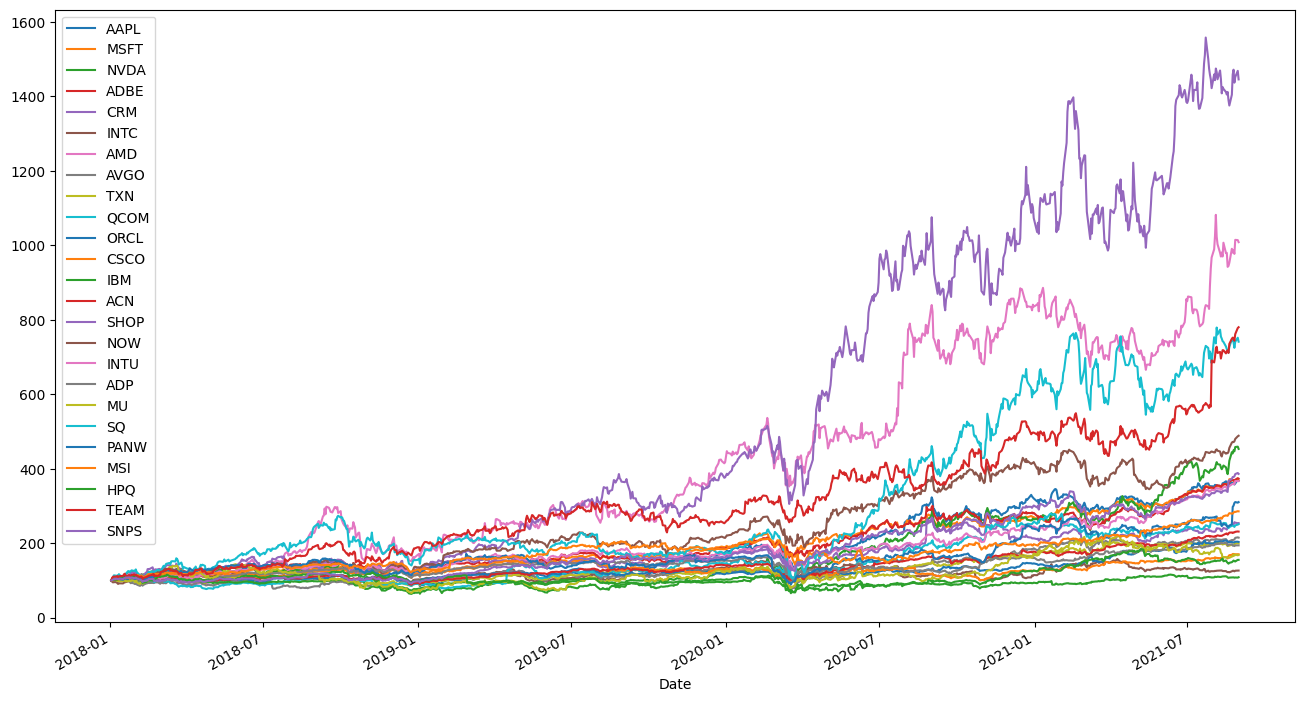

In [ ]:
(mult_df_tech / mult_df_tech.iloc[0] * 100).plot(figsize=(16, 9))

In [ ]:
returns = np.log(mult_df_tech / mult_df_tech.shift(1))
mean_ret = returns.mean() * 252
mean_ret

,0
AAPL,0.356176
MSFT,0.356726
NVDA,0.413065
ADBE,0.360161
CRM,0.254849
INTC,0.064467
AMD,0.631621
AVGO,0.209220
TXN,0.189086
QCOM,0.251749


In [ ]:
returns.cov() * 252

,AAPL,MSFT,NVDA,ADBE,CRM,INTC,AMD,AVGO,TXN,QCOM,...,NOW,INTU,ADP,MU,SQ,PANW,MSI,HPQ,TEAM,SNPS
AAPL,0.113308,0.078593,0.106075,0.082406,0.074045,0.074831,0.097857,0.080576,0.072463,0.079657,...,0.081020,0.075235,0.056813,0.087510,0.109249,0.058528,0.048397,0.063496,0.058849,0.073764
MSFT,0.078593,0.092915,0.105097,0.089913,0.082002,0.075619,0.092152,0.075127,0.071059,0.074390,...,0.086452,0.080132,0.062727,0.087490,0.112326,0.057432,0.048603,0.061162,0.067848,0.075230
NVDA,0.106075,0.105097,0.238340,0.117335,0.106906,0.111228,0.180650,0.118482,0.113367,0.112923,...,0.118259,0.108687,0.073309,0.152966,0.182063,0.088671,0.057323,0.088063,0.097614,0.109692
ADBE,0.082406,0.089913,0.117335,0.122851,0.100004,0.077503,0.105397,0.077915,0.075786,0.077754,...,0.108012,0.087505,0.061488,0.090978,0.133929,0.071206,0.051901,0.058824,0.089733,0.085305
CRM,0.074045,0.082002,0.106906,0.100004,0.134819,0.066773,0.097130,0.072533,0.068005,0.064207,...,0.104029,0.086091,0.057994,0.085787,0.129624,0.070258,0.049935,0.058106,0.088555,0.077817
INTC,0.074831,0.075619,0.111228,0.077503,0.066773,0.150626,0.087470,0.088989,0.088903,0.086781,...,0.073389,0.075060,0.062758,0.120165,0.102376,0.057745,0.047037,0.074592,0.048983,0.072318
AMD,0.097857,0.092152,0.180650,0.105397,0.097130,0.087470,0.312655,0.108612,0.105789,0.107262,...,0.118433,0.095518,0.065772,0.142338,0.161630,0.084462,0.060019,0.079551,0.101026,0.102044
AVGO,0.080576,0.075127,0.118482,0.077915,0.072533,0.088989,0.108612,0.148934,0.091549,0.098761,...,0.075602,0.074845,0.066087,0.121334,0.118540,0.064370,0.051718,0.080621,0.057876,0.078176
TXN,0.072463,0.071059,0.113367,0.075786,0.068005,0.088903,0.105789,0.091549,0.111315,0.086585,...,0.075723,0.071178,0.060570,0.116767,0.101528,0.053886,0.049535,0.072273,0.055583,0.072873
QCOM,0.079657,0.074390,0.112923,0.077754,0.064207,0.086781,0.107262,0.098761,0.086585,0.159647,...,0.071845,0.069716,0.056312,0.114210,0.102877,0.055784,0.045778,0.069637,0.052427,0.073724


In [ ]:
returns.corr()

,AAPL,MSFT,NVDA,ADBE,CRM,INTC,AMD,AVGO,TXN,QCOM,...,NOW,INTU,ADP,MU,SQ,PANW,MSI,HPQ,TEAM,SNPS
AAPL,1.000000,0.765961,0.645484,0.698453,0.599086,0.572794,0.519908,0.620263,0.645223,0.592259,...,0.594958,0.673922,0.578273,0.527719,0.554300,0.490388,0.483580,0.488265,0.400888,0.689379
MSFT,0.765961,1.000000,0.706236,0.841570,0.732667,0.639202,0.540663,0.638643,0.698718,0.610786,...,0.701062,0.792654,0.705061,0.582624,0.629356,0.531395,0.536286,0.519372,0.510398,0.776418
NVDA,0.645484,0.706236,1.000000,0.685705,0.596387,0.587037,0.661769,0.628865,0.696004,0.578898,...,0.598766,0.671272,0.514491,0.636018,0.636913,0.512264,0.394919,0.466910,0.458487,0.706842
ADBE,0.698453,0.841570,0.685705,1.000000,0.777058,0.569743,0.537781,0.576016,0.648069,0.555206,...,0.761737,0.752774,0.601058,0.526888,0.652594,0.572979,0.498043,0.434411,0.587048,0.765649
CRM,0.599086,0.732667,0.596387,0.777058,1.000000,0.468572,0.473094,0.511871,0.555121,0.437652,...,0.700327,0.706978,0.541163,0.474262,0.602931,0.539675,0.457413,0.409621,0.553031,0.666728
INTC,0.572794,0.639202,0.587037,0.569743,0.468572,1.000000,0.403064,0.594137,0.686573,0.559623,...,0.467415,0.583144,0.554034,0.628492,0.450509,0.419640,0.407628,0.497481,0.289405,0.586197
AMD,0.519908,0.540663,0.661769,0.537781,0.473094,0.403064,1.000000,0.503325,0.567060,0.480100,...,0.523554,0.515078,0.403021,0.516729,0.493681,0.426030,0.361025,0.368255,0.414298,0.574120
AVGO,0.620263,0.638643,0.628865,0.576016,0.511871,0.594137,0.503325,1.000000,0.711016,0.640481,...,0.484240,0.584770,0.586726,0.638202,0.524596,0.470428,0.450738,0.540743,0.343888,0.637267
TXN,0.645223,0.698718,0.696004,0.648069,0.555121,0.686573,0.567060,0.711016,1.000000,0.649506,...,0.561012,0.643267,0.622016,0.710422,0.519718,0.455518,0.499358,0.560705,0.382016,0.687124
QCOM,0.592259,0.610786,0.578898,0.555206,0.437652,0.559623,0.480100,0.640481,0.649506,1.000000,...,0.444465,0.526107,0.482882,0.580227,0.439740,0.393765,0.385348,0.451123,0.300875,0.580467


In [ ]:
weights = np.random.random(11)
weights /= np.sum(weights)
print('Weights :', weights)
print('Total Weight :', np.sum(weights))

Weights : [0.04736746 0.0394161  0.14731195 0.05455748 0.08374344 0.03583104
 0.24031657 0.1485178  0.0460935  0.00972174 0.14712293]
Total Weight : 1.0


In [ ]:
#np.sum(weights * returns.mean())*252*100

In [ ]:
# Assuming 'information_technology_tickers' contains the desired 11 assets:
num_assets = len(information_technology_tickers)
weights = np.random.random(num_assets)
weights /= np.sum(weights)
print('Weights :', weights)
print('Total Weight :', np.sum(weights))

# Calculate portfolio return
portfolio_return = np.sum(weights * returns[information_technology_tickers].mean()) * 252 * 100
print("Expected Portfolio Return:", portfolio_return)

Weights : [0.03411392 0.01786498 0.03323577 0.04629435 0.02480332 0.03268392
 0.05406572 0.0140838  0.0682952  0.06309524 0.01536249 0.07970838
 0.05245373 0.05450272 0.03372846 0.03357756 0.03365794 0.02913304
 0.08366451 0.02531776 0.01589948 0.04108312 0.04835568 0.03360991
 0.03140899]
Total Weight : 1.0
Expected Portfolio Return: 28.674999676796414


In [ ]:
np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))

0.2834900801237569

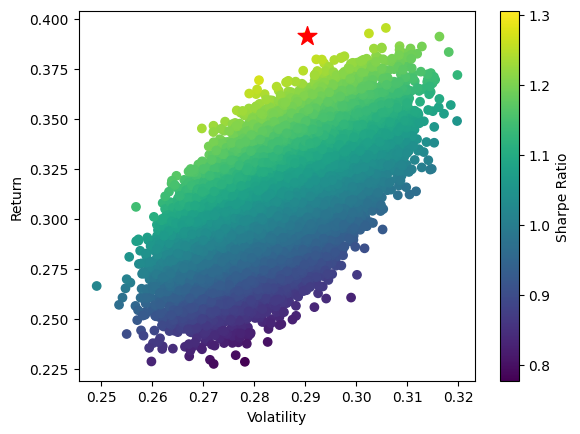

Max Sharpe Ratio: 1.3050698879087015
Return: 39.13690244506374
Volatility: 0.2903055445235603
Weights: [0.03283489 0.09384178 0.03155956 0.02750259 0.00373364 0.0109464
 0.08365408 0.02101532 0.0159405  0.00356448 0.01215514 0.00235502
 0.03545531 0.07903513 0.10397165 0.04222965 0.00976142 0.00558786
 0.00192581 0.03246023 0.02121468 0.08823995 0.06643133 0.09235421
 0.08222939]
Max Sortino Ratio: 1.5558152039198443
Return                                                 0.391369
Volatility                                             0.290306
Sharpe                                                  1.30507
Sortino                                                1.555815
Weights       [0.032834891397271894, 0.09384177548870969, 0....
Name: 5320, dtype: object


In [ ]:
def simulate_portfolios(returns, n=100000, risk_free=0.0125):
    results = []
    for _ in range(n):
        w = np.random.random(returns.shape[1])
        w /= w.sum()
        portfolio_returns = returns.dot(w)
        annual_return = portfolio_returns.mean() * 252
        annual_volatility = portfolio_returns.std() * np.sqrt(252)
        negative_returns = portfolio_returns[portfolio_returns < 0]
        if len(negative_returns) == 0:
            sortino_ratio = np.nan
        else:
            sortino_ratio = (annual_return - risk_free) / (negative_returns.std() * np.sqrt(252))
        sharpe_ratio = (annual_return - risk_free) / annual_volatility
        results.append([annual_return, annual_volatility, sharpe_ratio, sortino_ratio, w])
    df = pd.DataFrame(results, columns=["Return","Volatility","Sharpe","Sortino","Weights"])
    return df

df = simulate_portfolios(returns)
plt.scatter(df["Volatility"], df["Return"], c=df["Sharpe"], cmap="viridis")
plt.colorbar(label="Sharpe Ratio")
ms = df.loc[df["Sharpe"].idxmax()]
plt.scatter(ms["Volatility"], ms["Return"], marker="*", color="r", s=200)
plt.xlabel("Volatility")
plt.ylabel("Return")
plt.show()
print("Max Sharpe Ratio:", ms["Sharpe"])
print("Return:", ms["Return"]*100)
print("Volatility:", ms["Volatility"])
print("Weights:", ms["Weights"])
print("Max Sortino Ratio:", df["Sortino"].max())
print(df.loc[df["Sortino"].idxmax()])


In [ ]:
ms["Weights"]*100

array([ 3.28348914,  9.38417755,  3.15595648,  2.75025861,  0.37336403,
        1.09463988,  8.36540757,  2.10153208,  1.59404971,  0.35644832,
        1.2155141 ,  0.2355015 ,  3.54553105,  7.90351252, 10.39716467,
        4.22296517,  0.97614174,  0.55878557,  0.19258075,  3.24602335,
        2.12146827,  8.82399472,  6.64313286,  9.23542146,  8.2229389 ])

## Need Beta


In [ ]:
import yfinance as yf

# Download S&P 500 data (or reuse existing sp500 data if you already have it)
sp500_data = yf.download("^GSPC", period="5y", interval="1d")
sp500_data["SP500_Returns"] = sp500_data["Close"].pct_change()

# Weights of the max Sharpe ratio portfolio
optimal_weights = ms["Weights"]

# Compute daily returns for that portfolio
# 'returns' should be a DataFrame of daily returns for all assets, same date index as sp500_data
portfolio_returns = returns.mul(optimal_weights, axis=1).sum(axis=1)

# Combine portfolio & S&P returns and drop missing values
df_beta = pd.concat([portfolio_returns, sp500_data["SP500_Returns"]], axis=1).dropna()
df_beta.columns = ["Portfolio", "SP500"]

# Calculate beta: Cov(Portfolio, SP500) / Var(SP500)
beta = df_beta["Portfolio"].cov(df_beta["SP500"]) / df_beta["SP500"].var()

print(" Optimal Portfolio Beta vs. S&P 500:", beta)


[*********************100%***********************]  1 of 1 completed

 Optimal Portfolio Beta vs. S&P 500: 1.0622395363825483


Starting S&P 500 sector analysis with $1 investment simulation...
Found 11 sectors in the S&P 500
YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Available columns in SPY data: [('Close', 'SPY'), ('High', 'SPY'), ('Low', 'SPY'), ('Open', 'SPY'), ('Volume', 'SPY')]
'Adj Close' column not found, using 'Close' instead


[*********************100%***********************]  11 of 11 completed


Processing Information Technology (ETF: XLK)...
  Available columns for XLK: ['Open', 'High', 'Low', 'Close', 'Volume']
  'Adj Close' not found for XLK, using 'Close' instead
Processing Health Care (ETF: XLV)...
  Available columns for XLV: ['Open', 'High', 'Low', 'Close', 'Volume']
  'Adj Close' not found for XLV, using 'Close' instead
Processing Financials (ETF: XLF)...
  Available columns for XLF: ['Open', 'High', 'Low', 'Close', 'Volume']
  'Adj Close' not found for XLF, using 'Close' instead
Processing Consumer Discretionary (ETF: XLY)...
  Available columns for XLY: ['Open', 'High', 'Low', 'Close', 'Volume']
  'Adj Close' not found for XLY, using 'Close' instead
Processing Communication Services (ETF: XLC)...
  Available columns for XLC: ['Open', 'High', 'Low', 'Close', 'Volume']
  'Adj Close' not found for XLC, using 'Close' instead
Processing Industrials (ETF: XLI)...
  Available columns for XLI: ['Open', 'High', 'Low', 'Close', 'Volume']
  'Adj Close' not found for XLI, using 

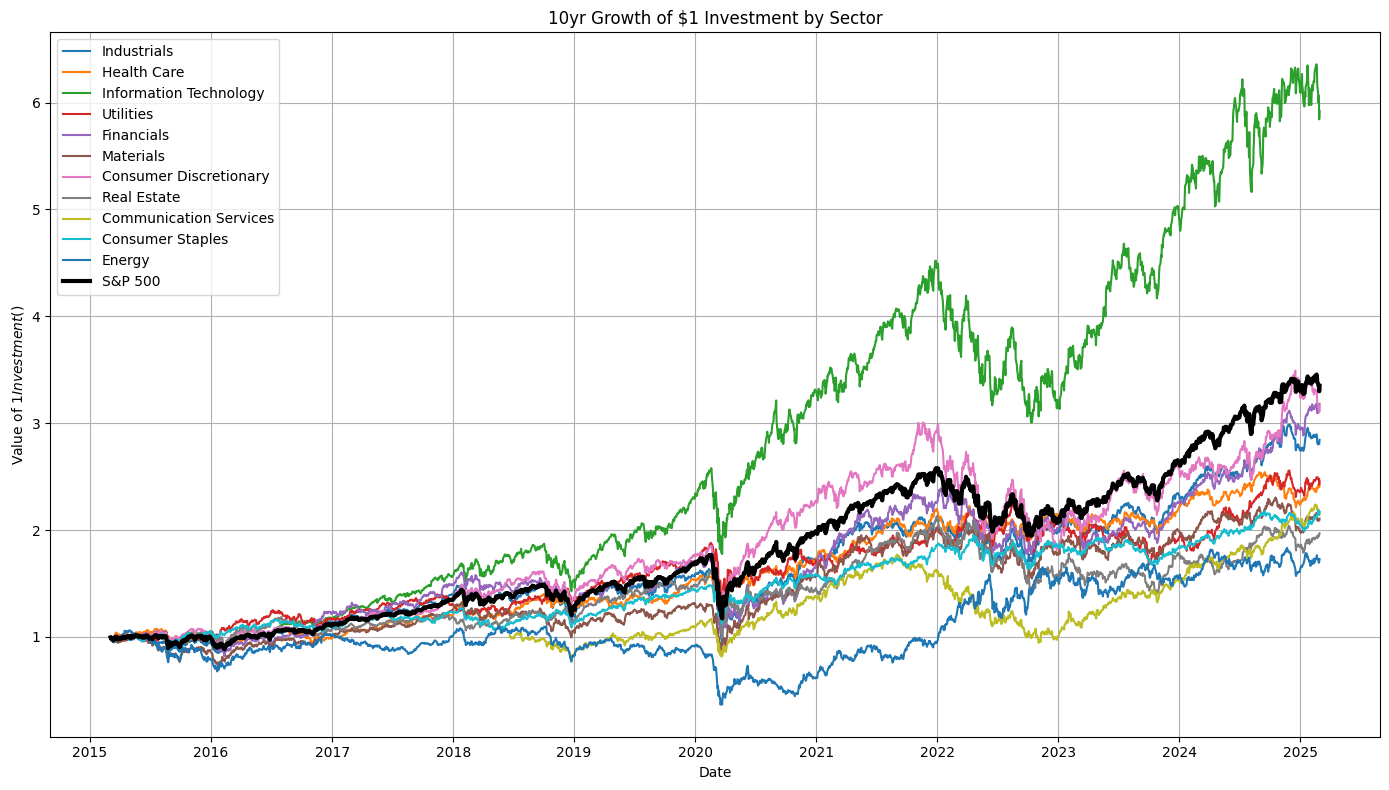

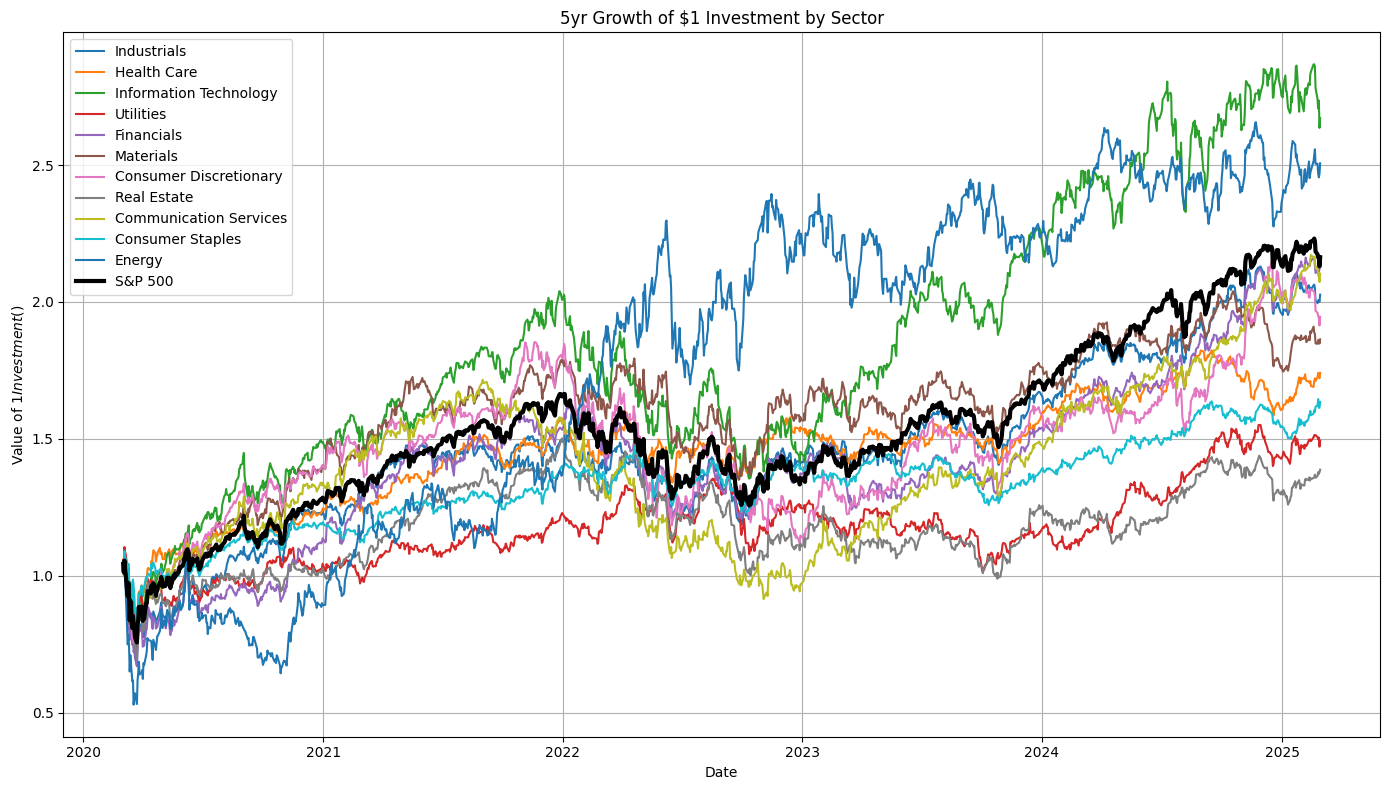

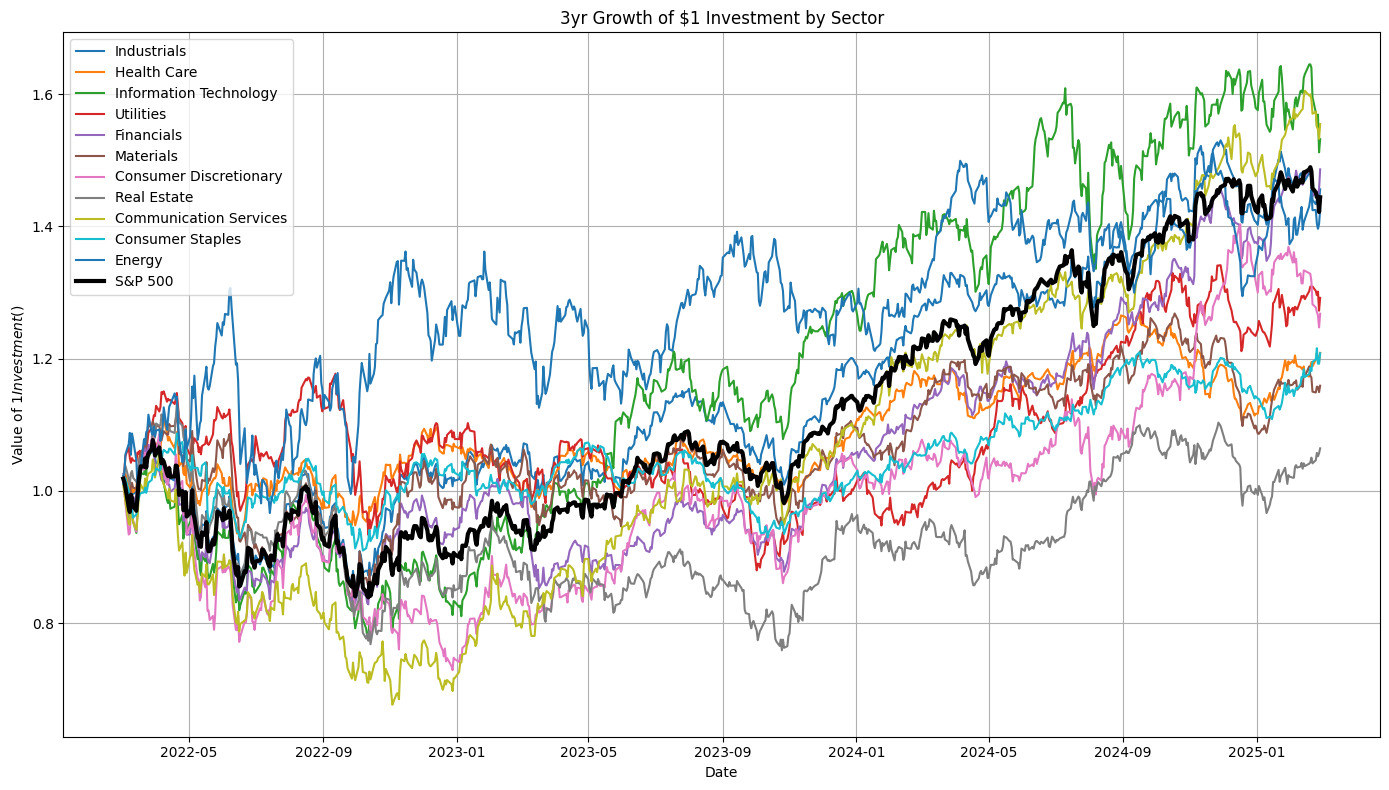

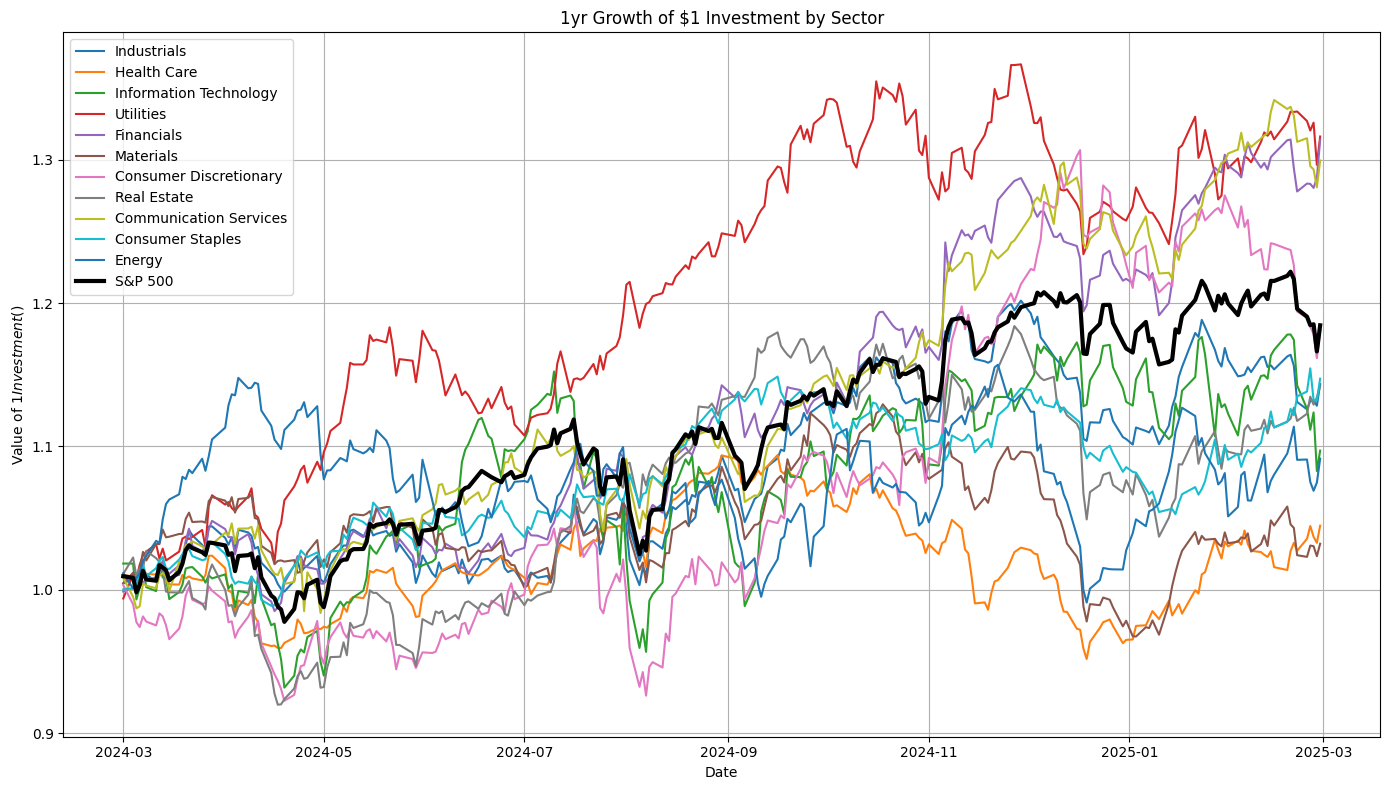

<Figure size 1200x1000 with 0 Axes>

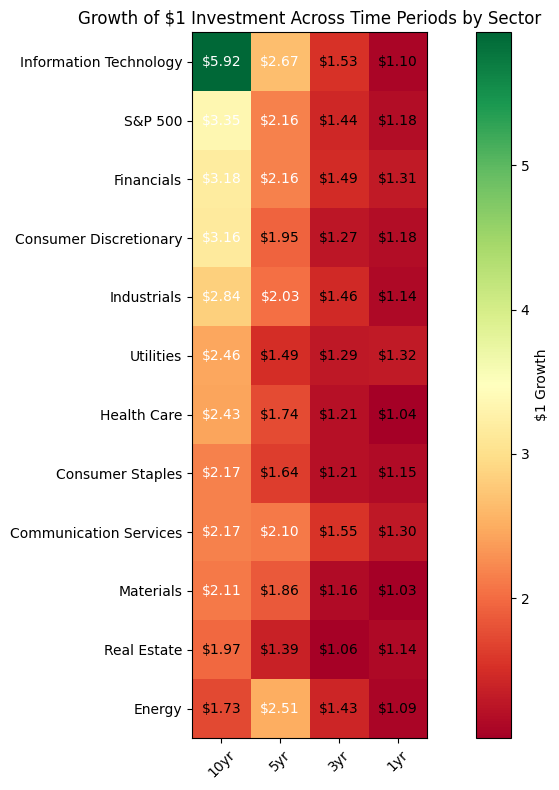

In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import os
import warnings
warnings.filterwarnings('ignore')

# Create output directory
os.makedirs('sector_analysis', exist_ok=True)

print("Starting S&P 500 sector analysis with $1 investment simulation...")

# 1. Read S&P 500 constituents from Wikipedia
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
sp500 = pd.read_html(url)[0]
sectors = sp500['GICS Sector'].unique().tolist()
print(f"Found {len(sectors)} sectors in the S&P 500")

# 2. Download S&P 500 ETF data as benchmark
print("Downloading S&P 500 ETF (SPY) data...")
spy_data = yf.download("SPY", period="10y", interval="1d")
print(f"Available columns in SPY data: {spy_data.columns.tolist()}")

# Fix for missing 'Adj Close' column
if 'Adj Close' in spy_data.columns:
    spy_data['Daily_Return'] = spy_data['Adj Close'].pct_change()
else:
    # Use regular 'Close' as fallback
    print("'Adj Close' column not found, using 'Close' instead")
    spy_data['Daily_Return'] = spy_data['Close'].pct_change()

# Define time periods
end_date = datetime.now()
periods = {
    "10yr": (end_date - timedelta(days=365*10)).strftime('%Y-%m-%d'),
    "5yr": (end_date - timedelta(days=365*5)).strftime('%Y-%m-%d'),
    "3yr": (end_date - timedelta(days=365*3)).strftime('%Y-%m-%d'),
    "1yr": (end_date - timedelta(days=365*1)).strftime('%Y-%m-%d')
}

# 3. Create sector ETF mapping
sector_etfs = {
    'Information Technology': 'XLK',
    'Health Care': 'XLV',
    'Financials': 'XLF',
    'Consumer Discretionary': 'XLY',
    'Communication Services': 'XLC',
    'Industrials': 'XLI',
    'Consumer Staples': 'XLP',
    'Energy': 'XLE',
    'Utilities': 'XLU',
    'Real Estate': 'XLRE',
    'Materials': 'XLB'
}

# 4. Download sector ETF data
print("Downloading sector ETF data...")
all_etfs = list(sector_etfs.values())
etf_data = yf.download(all_etfs, period="10y", interval="1d", group_by='ticker')

# 5. Process ETF data and calculate returns for each period
sector_returns = {}
dollar_growth = {}

for sector, etf in sector_etfs.items():
    print(f"Processing {sector} (ETF: {etf})...")
    if etf in etf_data.columns.levels[0]:
        # Check available columns for this ETF
        available_columns = etf_data[etf].columns.tolist()
        print(f"  Available columns for {etf}: {available_columns}")

        # Choose the appropriate price column
        if 'Adj Close' in available_columns:
            price_column = 'Adj Close'
        else:
            price_column = 'Close'
            print(f"  'Adj Close' not found for {etf}, using 'Close' instead")

        # Extract data for this ETF
        df = etf_data[etf][price_column].to_frame()
        df.columns = ['Price']
        df['Daily_Return'] = df['Price'].pct_change()

        # Calculate returns and dollar growth for each period
        sector_period_returns = {}
        dollar_period_growth = {}

        for period_name, start_date in periods.items():
            period_df = df[df.index >= start_date].copy()
            if not period_df.empty:
                # Calculate daily returns
                returns = period_df['Daily_Return'].dropna()

                # Calculate $1 growth over time
                dollar_value = (1 + returns).cumprod()

                # Calculate cumulative return
                cumulative_return = dollar_value.iloc[-1] - 1

                # Calculate annualized return
                days = (period_df.index[-1] - period_df.index[0]).days
                years = days / 365.25
                annualized_return = (1 + cumulative_return) ** (1/years) - 1 if years > 0 else np.nan

                sector_period_returns[period_name] = {
                    'cumulative': cumulative_return,
                    'annualized': annualized_return,
                    'returns_series': returns
                }

                dollar_period_growth[period_name] = {
                    'final_value': dollar_value.iloc[-1],
                    'dollar_series': dollar_value
                }
            else:
                sector_period_returns[period_name] = {
                    'cumulative': np.nan,
                    'annualized': np.nan,
                    'returns_series': pd.Series()
                }

                dollar_period_growth[period_name] = {
                    'final_value': np.nan,
                    'dollar_series': pd.Series()
                }

        sector_returns[sector] = sector_period_returns
        dollar_growth[sector] = dollar_period_growth
    else:
        print(f"Warning: No data found for {sector} ETF ({etf})")

# 6. Calculate S&P 500 returns and dollar growth for each period
spy_period_returns = {}
spy_dollar_growth = {}

for period_name, start_date in periods.items():
    period_spy = spy_data[spy_data.index >= start_date].copy()
    if not period_spy.empty:
        # Calculate daily returns
        returns = period_spy['Daily_Return'].dropna()

        # Calculate $1 growth over time
        dollar_value = (1 + returns).cumprod()

        # Calculate cumulative return
        cumulative_return = dollar_value.iloc[-1] - 1

        # Calculate annualized return
        days = (period_spy.index[-1] - period_spy.index[0]).days
        years = days / 365.25
        annualized_return = (1 + cumulative_return) ** (1/years) - 1 if years > 0 else np.nan

        spy_period_returns[period_name] = {
            'cumulative': cumulative_return,
            'annualized': annualized_return,
            'returns_series': returns
        }

        spy_dollar_growth[period_name] = {
            'final_value': dollar_value.iloc[-1],
            'dollar_series': dollar_value
        }
    else:
        spy_period_returns[period_name] = {
            'cumulative': np.nan,
            'annualized': np.nan,
            'returns_series': pd.Series()
        }

        spy_dollar_growth[period_name] = {
            'final_value': np.nan,
            'dollar_series': pd.Series()
        }

# 7. Create summary tables and visualizations for each period
for period_name in periods.keys():
    print(f"\nGenerating results for {period_name} period...")

    # Create summary table
    results = []
    for sector in sectors:
        if sector in sector_returns and period_name in sector_returns[sector]:
            sector_data = sector_returns[sector][period_name]
            dollar_data = dollar_growth[sector][period_name]

            results.append({
                'Sector': sector,
                'Final $1 Value': dollar_data['final_value'],
                'Cumulative Return': sector_data['cumulative'],
                'Annualized Return': sector_data['annualized']
            })

    # Add S&P 500 for comparison
    if period_name in spy_period_returns:
        spy_data = spy_period_returns[period_name]
        spy_dollar = spy_dollar_growth[period_name]

        results.append({
            'Sector': 'S&P 500',
            'Final $1 Value': spy_dollar['final_value'],
            'Cumulative Return': spy_data['cumulative'],
            'Annualized Return': spy_data['annualized']
        })

    results_df = pd.DataFrame(results)

    # Sort by Final $1 Value
    if not results_df.empty and 'Final $1 Value' in results_df.columns:
        results_df = results_df.sort_values('Final $1 Value', ascending=False)

        # Format for display
        display_df = results_df.copy()
        display_df['Final $1 Value'] = display_df['Final $1 Value'].apply(lambda x: f"${x:.2f}" if not pd.isna(x) else "N/A")
        display_df['Cumulative Return'] = display_df['Cumulative Return'].apply(lambda x: f"{x:.2%}" if not pd.isna(x) else "N/A")
        display_df['Annualized Return'] = display_df['Annualized Return'].apply(lambda x: f"{x:.2%}" if not pd.isna(x) else "N/A")

        print(f"\n=== {period_name} Sector Performance ($1 Investment) ===")
        print(display_df)

        # Save to CSV
        results_df.to_csv(f'sector_analysis/{period_name}_sector_performance.csv', index=False)

        # Plot the $1 growth over time
        plt.figure(figsize=(14, 8))

        for sector in sectors:
            if sector in dollar_growth and period_name in dollar_growth[sector]:
                series = dollar_growth[sector][period_name]['dollar_series']
                if not series.empty:
                    plt.plot(series.index, series.values, label=sector)

        # Add S&P 500
        if period_name in spy_dollar_growth:
            spy_series = spy_dollar_growth[period_name]['dollar_series']
            if not spy_series.empty:
                plt.plot(spy_series.index, spy_series.values, label='S&P 500', linewidth=3, color='black')

        plt.title(f'{period_name} Growth of $1 Investment by Sector')
        plt.xlabel('Date')
        plt.ylabel('Value of $1 Investment ($)')
        plt.legend(loc='best')
        plt.grid(True)
        plt.tight_layout()

        # Save the plot
        plt.savefig(f'sector_analysis/{period_name}_dollar_growth.png')
        print(f"Plot saved as 'sector_analysis/{period_name}_dollar_growth.png'")

# 8. Create a summary table comparing all periods
summary_data = []
for sector in sectors + ['S&P 500']:
    row = {'Sector': sector}

    for period_name in periods.keys():
        if sector == 'S&P 500':
            if period_name in spy_dollar_growth:
                row[f'{period_name} Value'] = spy_dollar_growth[period_name]['final_value']
        elif sector in dollar_growth and period_name in dollar_growth[sector]:
            row[f'{period_name} Value'] = dollar_growth[sector][period_name]['final_value']
        else:
            row[f'{period_name} Value'] = np.nan

    summary_data.append(row)

summary_df = pd.DataFrame(summary_data)

# Sort by 10yr performance
if '10yr Value' in summary_df.columns and not summary_df.empty:
    summary_df = summary_df.sort_values('10yr Value', ascending=False)

# Create display version with formatted dollar values
display_summary = summary_df.copy()
for col in display_summary.columns:
    if 'Value' in col:
        display_summary[col] = display_summary[col].apply(lambda x: f"${x:.2f}" if not pd.isna(x) else "N/A")

print("\n=== Summary of $1 Investment Growth Across Time Periods ===")
print(display_summary)
summary_df.to_csv('sector_analysis/dollar_growth_summary.csv', index=False)

# 9. Create a heatmap of dollar growth across time periods
plt.figure(figsize=(12, 10))

# Prepare data for heatmap
heatmap_data = summary_df.copy()
if not heatmap_data.empty:
    heatmap_data = heatmap_data.set_index('Sector')
    heatmap_cols = [col for col in heatmap_data.columns if 'Value' in col]

    if heatmap_cols:  # Check if we have any value columns
        heatmap_data = heatmap_data[heatmap_cols]

        # Rename columns for display
        heatmap_data.columns = [col.replace(' Value', '') for col in heatmap_data.columns]

        # Create heatmap
        plt.figure(figsize=(10, 8))
        im = plt.imshow(heatmap_data.values, cmap='RdYlGn')
        plt.colorbar(im, label='$1 Growth')
        plt.xticks(range(len(heatmap_data.columns)), heatmap_data.columns, rotation=45)
        plt.yticks(range(len(heatmap_data.index)), heatmap_data.index)

        # Add text annotations
        for i in range(len(heatmap_data.index)):
            for j in range(len(heatmap_data.columns)):
                value = heatmap_data.iloc[i, j]
                if not pd.isna(value):
                    text_color = "white" if value > 2 else "black"
                    plt.text(j, i, f"${value:.2f}", ha="center", va="center", color=text_color)

        plt.title('Growth of $1 Investment Across Time Periods by Sector')
        plt.tight_layout()
        plt.savefig('sector_analysis/dollar_growth_heatmap.png')
        print("Heatmap saved as 'sector_analysis/dollar_growth_heatmap.png'")
    else:
        print("Warning: No value data available for heatmap")
else:
    print("Warning: No data available for heatmap")

print("\nAnalysis complete! All results saved to the 'sector_analysis' directory.")
